In [1]:
!pip3 install gymnasium matplotlib

  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)


Episode 0, Total Reward: 26.0
Episode 100, Total Reward: 18.0
Episode 200, Total Reward: 18.0
Episode 300, Total Reward: 106.0
Episode 400, Total Reward: 13.0
Episode 500, Total Reward: 16.0
Episode 600, Total Reward: 20.0
Episode 700, Total Reward: 19.0
Episode 800, Total Reward: 153.0
Episode 900, Total Reward: 125.0
Episode 1000, Total Reward: 19.0
Episode 1100, Total Reward: 118.0
Episode 1200, Total Reward: 125.0
Episode 1300, Total Reward: 131.0
Episode 1400, Total Reward: 129.0
Episode 1500, Total Reward: 29.0
Episode 1600, Total Reward: 136.0
Episode 1700, Total Reward: 140.0
Episode 1800, Total Reward: 25.0
Episode 1900, Total Reward: 143.0
Episode 2000, Total Reward: 162.0
Episode 2100, Total Reward: 165.0
Episode 2200, Total Reward: 19.0
Episode 2300, Total Reward: 159.0
Episode 2400, Total Reward: 119.0
Episode 2500, Total Reward: 23.0
Episode 2600, Total Reward: 21.0
Episode 2700, Total Reward: 27.0
Episode 2800, Total Reward: 23.0
Episode 2900, Total Reward: 18.0
Episode 

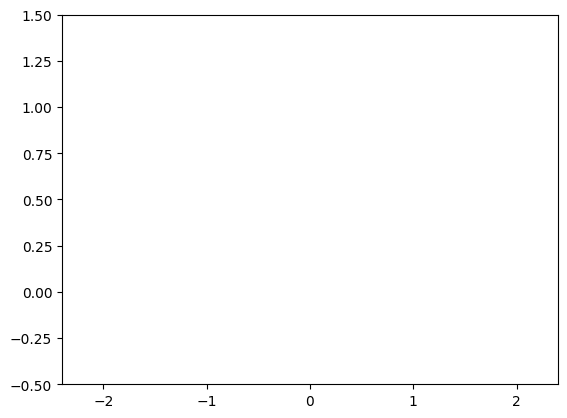

In [2]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import animation

# Initialize the environment
env = gym.make('CartPole-v1')

# Parameters for Q-learning
state_bins = [6, 6, 12, 12]  # Bins for cart position, cart velocity, pole angle, pole velocity
num_actions = env.action_space.n
learning_rate = 0.1
discount_factor = 0.99
exploration_rate = 1.0  # Initial exploration rate
exploration_decay = 0.995
min_exploration_rate = 0.01
num_episodes = 10000

# Function to discretize the continuous state space
def discretize_state(state, bins):
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_high[1], env_high[3] = 5, 5  # Limit velocities for better discretization
    env_low[1], env_low[3] = -5, -5
    discretized_state = []
    
    for i in range(len(state)):
        scaling = (state[i] - env_low[i]) / (env_high[i] - env_low[i])
        new_state = int(np.digitize(scaling, np.linspace(0, 1, bins[i])))
        discretized_state.append(new_state)
    
    return tuple(discretized_state)

# Initialize the Q-table
q_table = np.zeros((*state_bins, num_actions))

# Q-learning algorithm
for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state, state_bins)
    done = False
    total_reward = 0

    while not done:
        if random.uniform(0, 1) < exploration_rate:
            # Explore: choose a random action
            action = env.action_space.sample()
        else:
            # Exploit: choose the action with the highest Q-value
            action = np.argmax(q_table[state])

        # Take action, observe the result
        next_state, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state, state_bins)

        # Update Q-value
        best_future_q = np.max(q_table[next_state])
        q_table[state + (action,)] += learning_rate * (reward + discount_factor * best_future_q - q_table[state + (action,)])

        # Move to the next state
        state = next_state
        total_reward += reward

        if done:
            break

    # Decay exploration rate
    exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)

    # Display progress
    if episode % 100 == 0:
        print(f'Episode {episode}, Total Reward: {total_reward}')


# Now we create the animation for the trained agent

# Create a figure for animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([-2.4, 2.4])
ax.set_ylim([-0.5, 1.5])

# Create objects for the cart and pole
cart, = ax.plot([], [], 'o-', lw=2)
pole, = ax.plot([], [], 'o-', lw=2)

def init():
    cart.set_data([], [])
    pole.set_data([], [])
    return cart, pole

def animate(i):
    # Get the action from the trained Q-table
    global state
    action = np.argmax(q_table[state])
    state, _, done, _, _ = env.step(action)
    state = discretize_state(state, state_bins)

    # Get the cart and pole positions
    cart_position = state[0]  # Cart position
    pole_angle = state[2]     # Pole angle

    # Update cart and pole positions
    cart.set_data([cart_position], [0])
    pole.set_data([cart_position, cart_position + np.sin(pole_angle)],
                  [0, np.cos(pole_angle)])

    if done:
        state, _ = env.reset()
        state = discretize_state(state, state_bins)

    return cart, pole

# Create animation
state, _ = env.reset()
state = discretize_state(state, state_bins)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

plt.show()

env.close()


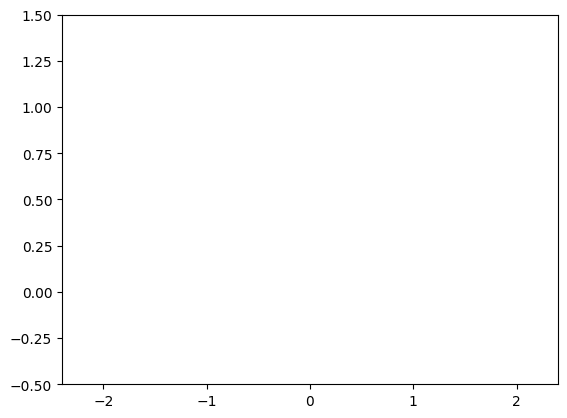

In [3]:
# Create animation
# Create a figure for animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([-2.4, 2.4])
ax.set_ylim([-0.5, 1.5])

state, _ = env.reset()
state = discretize_state(state, state_bins)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=50, blit=True)

plt.show()

env.close()